# Problem 3

In [44]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [45]:
data = pd.read_csv('data/pendigits.tra',header=None)
data.to_csv('data/pendigits.csv', index=False)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


#### a. Bu veri seti içinde bağımlı değişkeni ‘1’ olanları ayrı bir veri kümesi haline getiriniz. Sonrasında bu veri kümesi için PCA gerçekleştiriniz ve Principal Component dağılımlarının grafik matrisini gösteriniz. Kaç bileşen tutacaksınız? Sebeplerini açıklayınız. İlk dört bileşenin her birini inceleyip her bileşen tarafından kapsanan varyasyon oranlarını açıklayınız.

In [46]:
data_for_one = data[data[16] == 1]
data_for_one.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1
21,0,46,49,64,78,87,100,100,91,75,85,49,75,24,89,0,1
29,100,84,31,100,0,88,8,70,15,53,15,35,0,17,0,0,1
51,51,76,68,91,100,100,83,80,59,60,34,40,10,20,0,0,1


In [47]:
X = data_for_one.iloc[:, 0:16].values
y = data_for_one.iloc[:, 16].values

In [48]:
x_scaled = StandardScaler().fit_transform(X)

In [49]:
pca = PCA(n_components=9)
 
pca_features = pca.fit_transform(x_scaled)
 
print('Shape before PCA: ', x_scaled.shape)
print('Shape after PCA: ', pca_features.shape)
 
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2', 'PC3','PC4','PC5','PC6','PC7','PC8','PC9'])

Shape before PCA:  (779, 16)
Shape after PCA:  (779, 9)


In [50]:
pca_df['target'] = y

In [51]:
pca.explained_variance_

array([7.87496392, 2.35533002, 1.67902588, 1.0263448 , 0.88400569,
       0.50946671, 0.45244735, 0.36414339, 0.27647422])

In [52]:
pca.explained_variance_ratio_

array([0.49155343, 0.14701916, 0.10480441, 0.06406421, 0.05517943,
       0.03180079, 0.02824166, 0.02272975, 0.01725746])

* RESULT = 0,9626503

In [54]:
pca.explained_variance_ratio_.cumsum()

array([0.49155343, 0.63857258, 0.74337699, 0.8074412 , 0.86262063,
       0.89442142, 0.92266308, 0.94539283, 0.96265028])

In [55]:
pca.mean_

array([-4.10454725e-17, -1.14015202e-17,  9.86231493e-17, -2.26890251e-16,
        1.08314441e-16, -5.10788103e-16, -1.49359914e-16, -7.06894249e-17,
       -1.01473529e-16, -3.76250165e-17, -9.80530733e-17, -9.57727693e-17,
       -1.20856114e-16,  1.04893985e-16,  2.50833443e-17,  2.05227363e-17])

In [53]:
pca.components_

array([[ 0.21807792,  0.23338167,  0.18375849,  0.27609846, -0.03753847,
         0.09124637, -0.28851327, -0.32604359, -0.30271932, -0.33670971,
        -0.28961236, -0.33119847, -0.17956004, -0.31022111,  0.10278154,
         0.2259977 ],
       [-0.06075424, -0.15266336, -0.37541484, -0.23819276, -0.57383464,
        -0.36751323, -0.27290989, -0.05669793, -0.07895806, -0.04748938,
        -0.04283698, -0.04438753,  0.24831733,  0.02910607,  0.32658115,
         0.22765173],
       [ 0.4210828 ,  0.09795268, -0.08120649, -0.09523532, -0.20183512,
        -0.3425673 , -0.10284958,  0.04642226, -0.19952436,  0.14243327,
        -0.18451038,  0.17601736, -0.40812899,  0.22212249, -0.52519998,
        -0.0986983 ],
       [ 0.25428012, -0.28284699,  0.55409059, -0.06669539,  0.21068872,
        -0.56860085,  0.1378663 , -0.22538387,  0.15658671, -0.05269443,
         0.0752674 ,  0.02399727,  0.14514893,  0.05227451,  0.10059053,
         0.19727249],
       [ 0.31474607,  0.54592671,  0

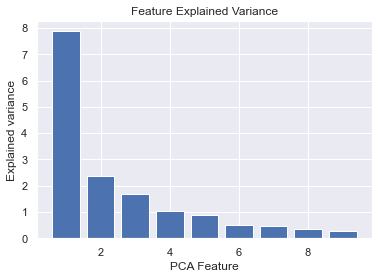

In [57]:
from sklearn.decomposition import PCA
sns.set()
 
# Reduce from 4 to 3 features with PCA
pca = PCA(n_components=9)
 
# Fit and transform data
pca.fit_transform(x_scaled)
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

Text(0, 0.5, 'cumulative explained variance')

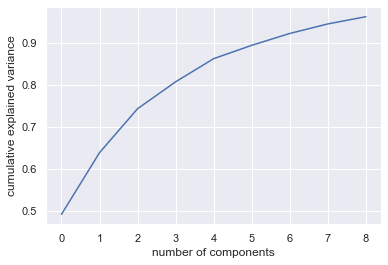

In [58]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

#### b. Şimdi aynı işlemi veri seti içinde bağımlı değişkeni ‘7’ olanları ayrı bir veri kümesi haline getiriniz. Sonrasında bu veri kümesi için PCA gerçekleştiriniz ve Principal Component dağılımlarının grafik matrisini gösteriniz. Kaç bileşen tutacaksınız? Sebeplerini açıklayınız. İlk dört bileşenin her birini inceleyip her bileşen tarafından kapsanan varyasyon oranlarını açıklayınız.

In [62]:
data_for_seven = data[data[16] == 7]
data_for_seven.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
14,0,85,38,100,81,88,87,50,84,12,58,0,53,22,100,24,7
32,0,98,36,100,80,85,68,42,56,0,25,23,50,37,100,32,7
40,0,93,62,100,100,78,69,43,50,5,35,0,15,35,86,37,7
64,0,100,61,100,100,93,63,64,36,33,14,0,9,29,47,42,7
75,0,97,42,100,67,71,53,35,34,0,16,23,40,42,100,42,7


In [63]:
X = data_for_seven.iloc[:, 0:16].values
y = data_for_seven.iloc[:, 16].values

In [64]:
x_scaled = StandardScaler().fit_transform(X)

In [65]:
pca = PCA(n_components=9)
 
pca_features = pca.fit_transform(x_scaled)
 
print('Shape before PCA: ', x_scaled.shape)
print('Shape after PCA: ', pca_features.shape)
 
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2', 'PC3','PC4','PC5','PC6','PC7','PC8','PC9'])

Shape before PCA:  (778, 16)
Shape after PCA:  (778, 9)


In [66]:
pca_df['target'] = y

In [67]:
pca.explained_variance_

array([6.17085583, 2.61395693, 1.79377255, 1.41699298, 0.9683211 ,
       0.7998649 , 0.64142128, 0.49193723, 0.38096392])

In [68]:
pca.explained_variance_ratio_

array([0.38518276, 0.16316232, 0.11196668, 0.08844823, 0.06044228,
       0.0499273 , 0.0400373 , 0.03070656, 0.02377964])

In [69]:
pca.explained_variance_ratio_.cumsum()

array([0.38518276, 0.54834508, 0.66031176, 0.74875999, 0.80920227,
       0.85912957, 0.89916687, 0.92987343, 0.95365307])

In [70]:
pca.components_

array([[-0.05903233, -0.00500511, -0.24286114, -0.06734305, -0.0155228 ,
         0.32181452,  0.34445712,  0.37256181,  0.32387737,  0.35897042,
         0.26141909,  0.09425747,  0.04567512, -0.2811223 , -0.26538456,
        -0.33043807],
       [-0.0742085 , -0.12877855, -0.36395524, -0.02081147, -0.5554185 ,
        -0.14222647, -0.1847333 , -0.04346973, -0.03002929,  0.05000231,
         0.05847548,  0.48771085,  0.42261869,  0.23827304, -0.0119369 ,
         0.0084987 ],
       [ 0.45919596,  0.28334892,  0.15760389, -0.41671163, -0.14270312,
        -0.16635394, -0.10913753,  0.10248743, -0.22882563,  0.23228778,
        -0.29038177,  0.28492242, -0.28235042, -0.0837014 , -0.1323365 ,
        -0.25268683],
       [ 0.13244631,  0.4557196 ,  0.25668512, -0.17760972,  0.10099668,
        -0.2381871 ,  0.03598084, -0.17893885,  0.17789753, -0.15142484,
         0.49183085, -0.01814367,  0.35892816,  0.0644585 , -0.37006427,
         0.10179548],
       [ 0.67594562, -0.56556957,  0

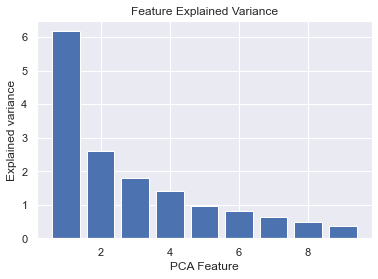

In [71]:
from sklearn.decomposition import PCA
sns.set()
 
# Reduce from 4 to 3 features with PCA
pca = PCA(n_components=9)
 
# Fit and transform data
pca.fit_transform(x_scaled)
 
# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

Text(0, 0.5, 'cumulative explained variance')

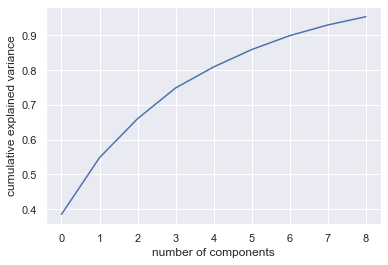

In [72]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')